### Introduction
***USA- based telco comapny provides internet & phone service near about 7000 customer in california***
#### We have some business problems and company need more insights so we will explore as deep as possible through python and other statistical methods

We will import "pandas"(for manupulation the data) & "numpy" is used for numerical data, "seaborn" & matplotlib for data visuals. Then we will import other libraries as need

#### Lets do some basic exploration first for understanding the dataset

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df=pd.read_excel('/content/Telco_customer_churn.xlsx')  # Reading the dataset
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1.0,89.0,5340.0,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1.0,United States,California,Landers,92285.0,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0.0,45.0,5306.0,NaN
7039,6840-RESVB,1.0,United States,California,Adelanto,92301.0,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0.0,59.0,2140.0,NaN
7040,2234-XADUH,1.0,United States,California,Amboy,92304.0,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0.0,71.0,5560.0,NaN
7041,4801-JZAZL,1.0,United States,California,Angelus Oaks,92305.0,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0.0,59.0,2793.0,NaN


In [ ]:
df.columns  #chking the columns names 

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
df.describe()  # a breif stat overview about the dataset *(please ignore the zipcode and lat-long information) 

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [ ]:
df.info()  # gives information about data types and info of null values (if there is mismatch in data type we will handle it)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   float64
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   float64
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   float64
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

It is visible that 32 columns are present 

In [ ]:
df.isnull().sum()  # chking the total null values present in the dataset ( as we can see "Churn Reason" column has lot of null values)

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

**There is no null values other than Churn Reason column so not performing any method as of now**

In [ ]:
df['Churn Reason'] # lets look at the "Churn Reason " column for better understanding about the data

0        Competitor made better offer
1                               Moved
2                               Moved
3                               Moved
4       Competitor had better devices
                    ...              
7038                              NaN
7039                              NaN
7040                              NaN
7041                              NaN
7042                              NaN
Name: Churn Reason, Length: 7043, dtype: object

In [ ]:
df['Senior Citizen']  # lets look at the "Senior Citizen " column for better understanding about the data

0       No
1       No
2       No
3       No
4       No
        ..
7038    No
7039    No
7040    No
7041    No
7042    No
Name: Senior Citizen, Length: 7043, dtype: object

In [ ]:
df['Partner']   # lets look at the "Partner " column for better understanding about the data

0        No
1        No
2        No
3       Yes
4        No
       ... 
7038     No
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: object

### Q1: Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.

**Lests go column by column**

 ***Customer ID*** (statistically)--> its a descrete data type (it can be counted ) & in (Python) --> its an     object data types as its contains both numerical and string values.
 ***count*** (statistically)--> its a ...... & in (Python) --> its a float data type.
 ***Country*** (statistically)--> its a nominal data type & in (Python)--> its a string data type.
 ***State***(statisticaly)--> its a nominal data type & in (Python)--> its a string data type.
 ***City***(statistically)--> its a nominal data type & in (Python)--> its a string data type.
 ***Zipcode***(statistically)--> its a descrete data type & in (Python)--> its a numerical data type.



### Q2: Please apply appropriate statistical measures using python based on data types.

**Basic Exploration**

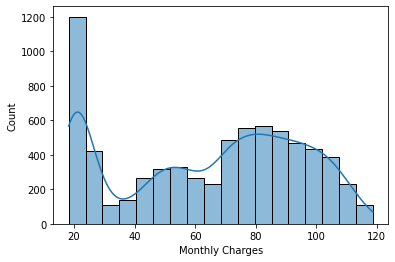

In [ ]:
sns.histplot(df['Monthly Charges'],kde=True) # its a histogram , it shows how datapoints are distributed 

Its understandable from the above plot that most of the cx uses 20 monthly charges , & also from 50-110 monthly charges there are lot cx present. Lets see bit more deeper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


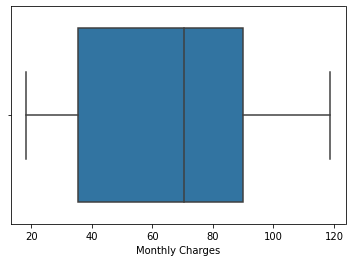

In [ ]:
sns.boxplot(df['Monthly Charges'])  # trying to see median value (in this dataset context)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


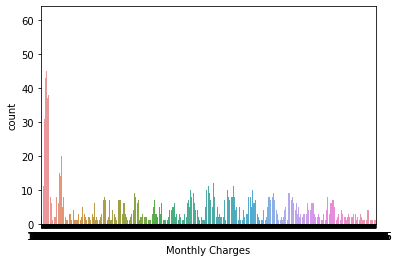

In [ ]:
sns.countplot(df['Monthly Charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


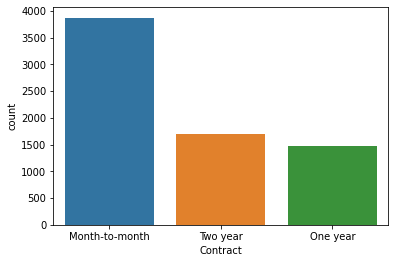

In [ ]:
sns.countplot(df['Contract']) # Graphical representation is lot easier to understand

Its clear that count of cx "Month-Month" is more and they are the most valuable cx, then "Two Year" and then "One year"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


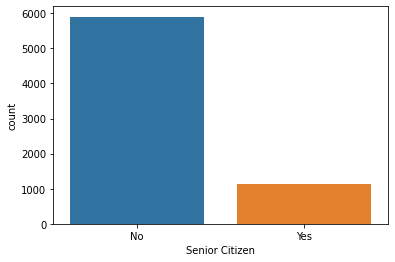

In [ ]:
sns.countplot(df['Senior Citizen']) # senior citizens are less we should try to increase teh count of senior citizens  

In [ ]:
df['Total Charges'] 

NameError: ignored

**Basic Exploration ends here**

In [ ]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'],errors='coerce') # converting data type from object to numerical value

In [ ]:
df.info()  # we can see Total charges column has changed to Float data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   float64
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   float64
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   float64
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
import matplotlib.pyplot as plt
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1.0,89.0,5340.0,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1.0,United States,California,Landers,92285.0,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0.0,45.0,5306.0,NaN
7039,6840-RESVB,1.0,United States,California,Adelanto,92301.0,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.50,No,0.0,59.0,2140.0,NaN
7040,2234-XADUH,1.0,United States,California,Amboy,92304.0,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,0.0,71.0,5560.0,NaN
7041,4801-JZAZL,1.0,United States,California,Angelus Oaks,92305.0,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0.0,59.0,2793.0,NaN


In [ ]:
#df.drop(['Zip Code'],axis=1,inplace=True) 
df.drop(['Lat Long'],axis=1,inplace =True)
df.drop(['Latitude'],axis=1,inplace=True)
df.drop(['Longitude'],axis=1,inplace=True)

Droping the columns as we dont need them

In [ ]:
df.columns # verifying the columns has been dropped

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
df.describe() 

,Count,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [ ]:
np.mean(df['Total Charges']) # Trying to see mean value of 'Total Charges' column

2283.3004408418697

In [ ]:
df["Total Charges"].mean()  # we can see both ways 

2283.3004408418697

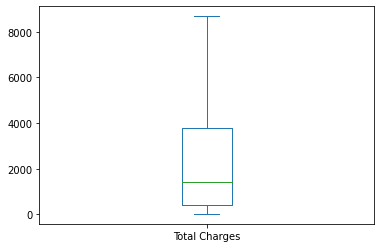

In [ ]:
df['Total Charges'].plot(kind="box") # total charges median value is less than 2000 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0ce348dd0>,
      dtype=object)

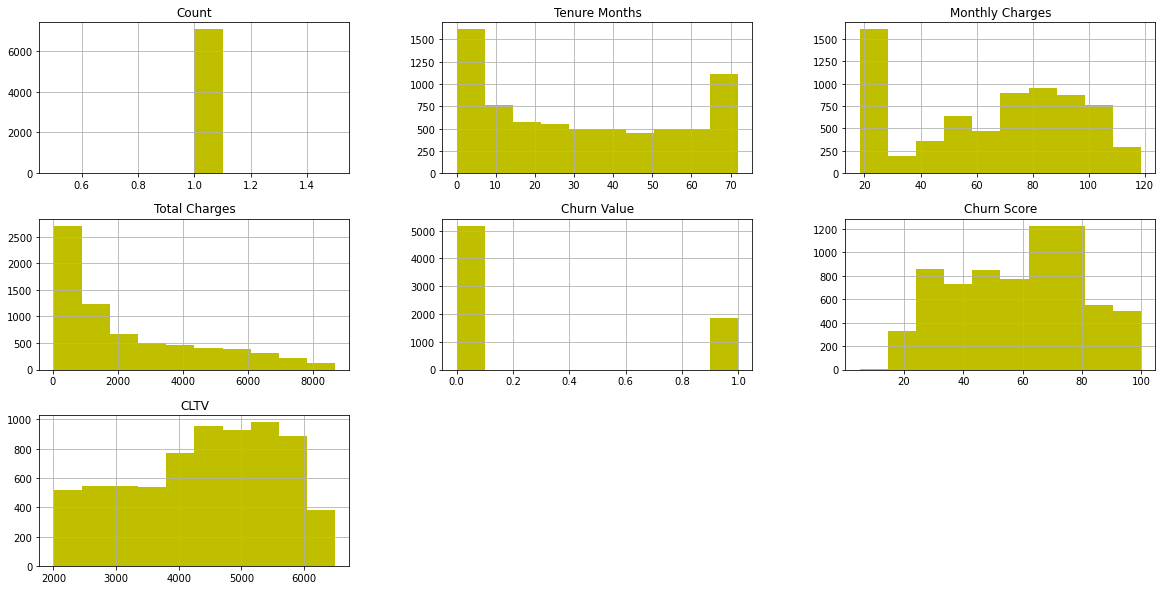

In [ ]:
df.hist(figsize=(20,10),color='y') # Lets see all the numerical values graph in one view

**We can see all the numeric data and distribution "TotalCharges" seems like positivly skwed ,"CLTV" negatively skwed, "MonthlyCharges"-- 20month cx are higher.**

###Q3: What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.



In [ ]:
female=((df['Gender']).value_counts(normalize=True)['Female'].sum()) *100 # we can see the 50% of female present in this dataset
female.round()

50.0

In [ ]:


plt.pie(df,labels=Gender,autopct='%1.2f%%')  # it will show the piechart for gender column with percentage.

NameError: ignored

In [ ]:
senior=((df['Senior Citizen']).value_counts(normalize=True)['Yes'].sum()) *100 # 16% Senior Citizen present in this dataset 
senior.round()

16.0

In [ ]:
#df['percent']= (df['Gender'].value_counts()['Female']/ df['Senior Citizen'].value_counts()['Yes'].sum()) *100
#df['percent']

### Q4:  Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.

In [ ]:
from scipy.stats import skew
skew(df['Tenure Months'])


0.2394887299846216

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


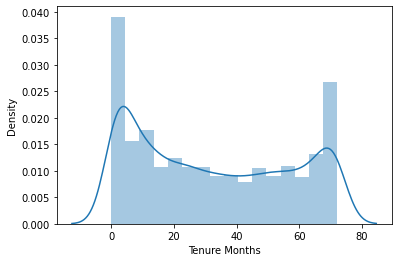

In [ ]:
sns.distplot(df['Tenure Months'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


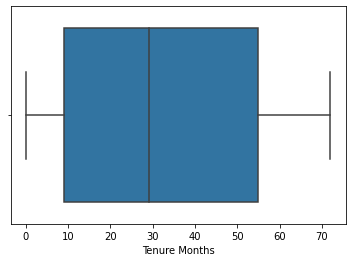

In [ ]:
sns.boxplot(df['Tenure Months'])

"Tenure Months" is positively skewd because most cx with the company for 0-10  as well as skew value also shows.

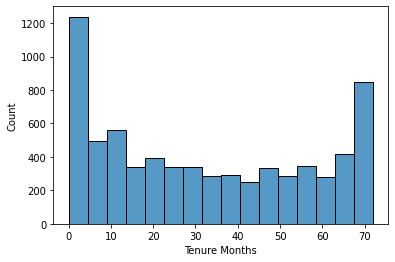

In [ ]:
sns.histplot(df['Tenure Months'])

### Q5: Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.

### Q6: Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


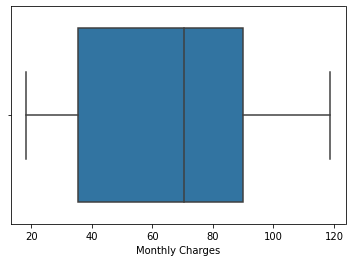

In [ ]:
sns.boxplot(df['Monthly Charges']) #we can see median value of "Monthly Charges" near about 70.

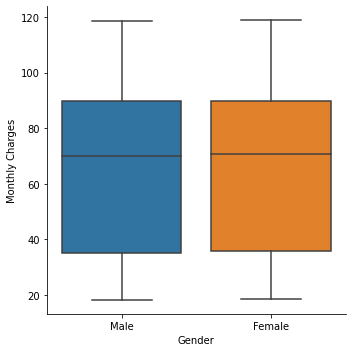

In [ ]:
sns.catplot(x='Gender',y='Monthly Charges',data=df, orient='v', kind='box') # 

As its visible monthly charges between male & female are same and monthly charges of male and female are above near about 70 , male & female data distribuition is normal

### Q7: Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.

### Q8: Please find which payment method has the highest churn score and which has the lowest churn score

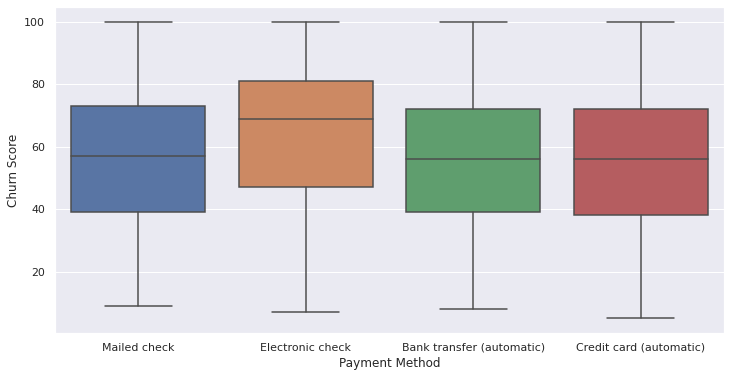

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)  # boxplot is good to undestand for min ,max, median data points ,thats why using boxplot to ans the question.
sns.boxplot(x='Payment Method',y='Churn Score',data=df)

"Electronic check" payment method has the highest churn score and "Credit card" has the lowest.

### Q9: Please create an appropriate plot to check the count of payment methods and explain it.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


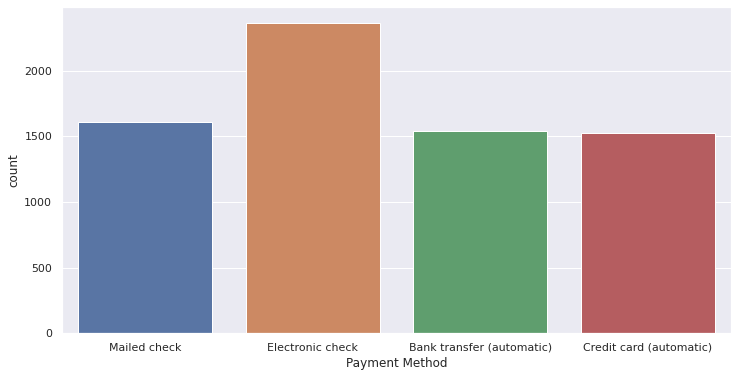

In [ ]:
sns.countplot(df['Payment Method'])

In [ ]:
df['Payment Method'].value_counts() 

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Payment Method, dtype: int64

Its clear that **Electronic Check** is the popular payment method folowwed by **Mailed check** then **Bank transfer** and **Credit card** is the least popular payment method

### Q10: Please create an appropriate plot to see the relationship between monthly charges and total charges

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


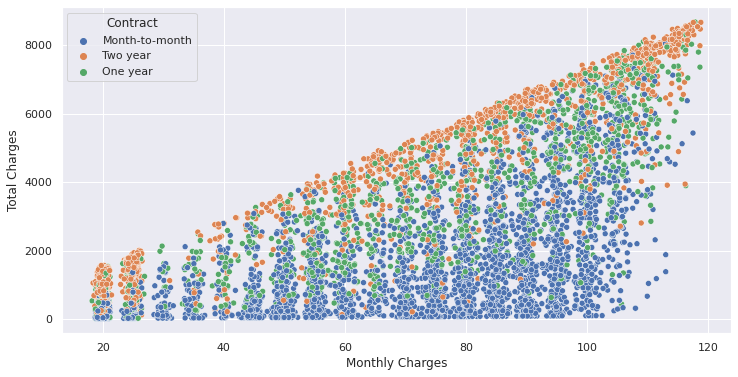

In [ ]:
sns.scatterplot('Monthly Charges','Total Charges',hue='Contract',data=df) # we can see the trend & relationships with "Contract" also.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


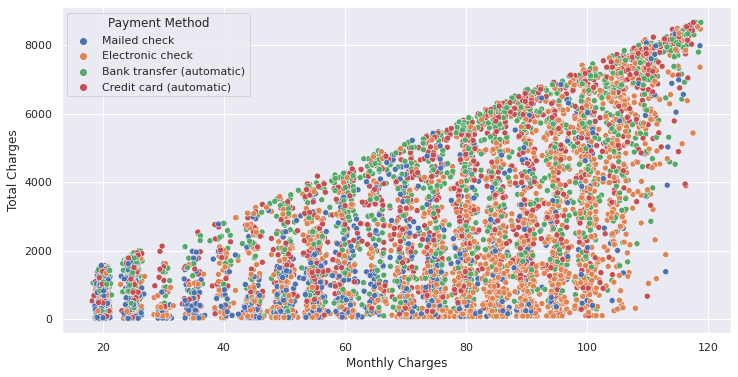

In [ ]:
sns.scatterplot('Monthly Charges','Total Charges',hue='Payment Method',data=df)

As **Monthly Charges** increasing **Total Charges** also increasing & eletronic check is widely used payment method.

### Observations & Suggesions

**There is scope for increase senior citizen count. 
Most of customers staying with the company for 20 months so cx retaintion can be improved by applying / running some offer / discounts tto these specific cx.
If company permits we should increase "Electronic check" and "Bank Transfer" as these payment methods are mostly use and convinient also. We should run Promotions and campaign for better customer engagements.**